   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8 

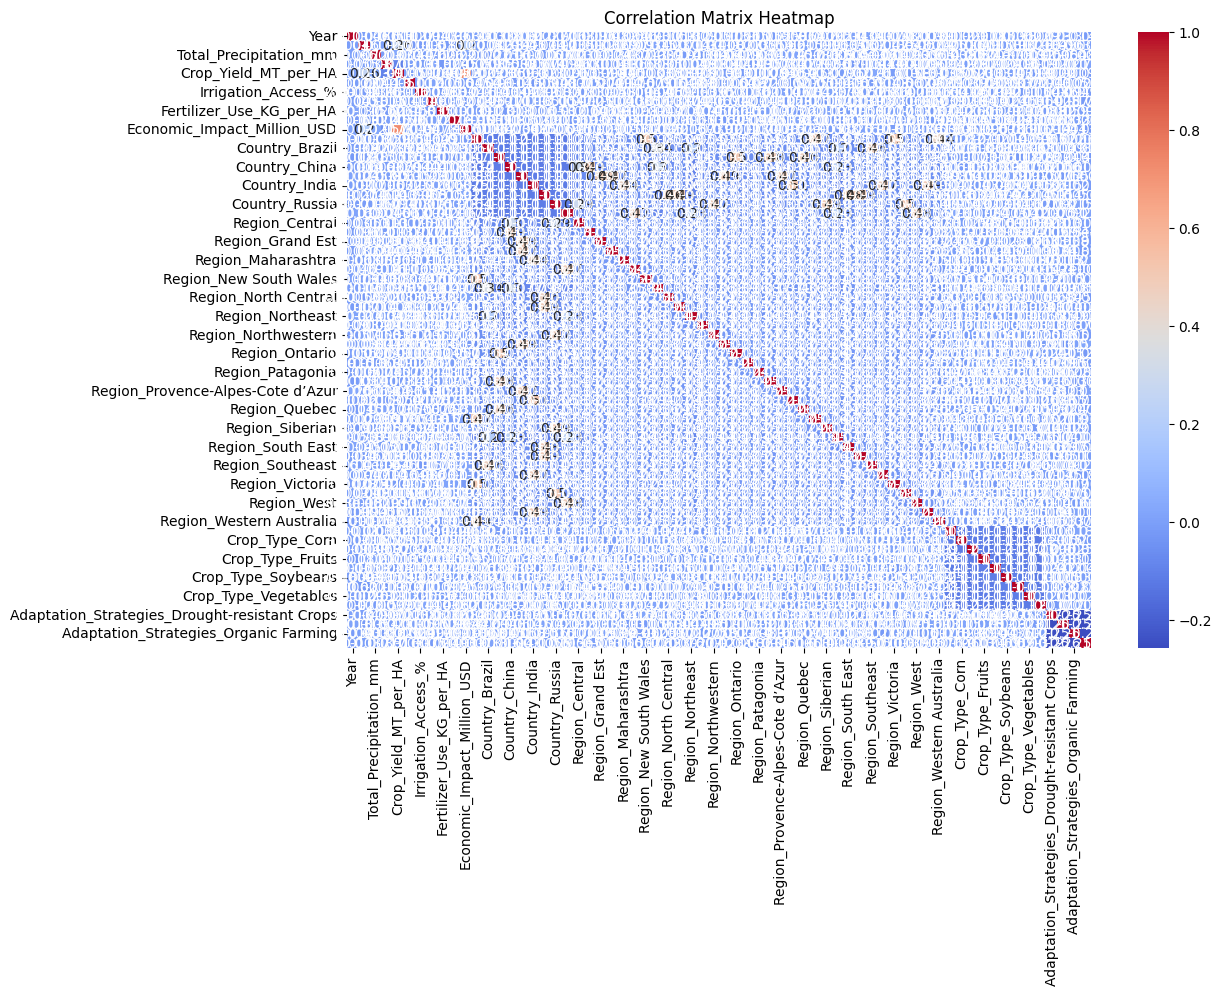

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'climate_change_impact_on_agriculture_2024.csv'  # Replace with your local file path
df = pd.read_csv("../input/climate-change-impact-on-agriculture/climate_change_impact_on_agriculture_2024.csv")

# Display the first few rows to inspect the data
print(df.head())

# 1. Convert Categorical Data using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies'], drop_first=True)

# 2. Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['Crop_Yield_MT_per_HA'])  # Features
y = df_encoded['Crop_Yield_MT_per_HA']  # Target variable (crop yield)

# 3. Feature Scaling: Standardize the numerical features
scaler = StandardScaler()

# Identify the columns to scale (excluding the one-hot encoded columns)
columns_to_scale = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events',
                    'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 
                    'Economic_Impact_Million_USD']

# Apply scaling to the relevant columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# 4. Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

# 5. (Optional) Perform some basic analysis to check the correlation between variables
correlation_matrix = df_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)

# If you'd like to visualize relationships, you can also use libraries like seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualize the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
